In [1]:
import cv2 as cv

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
img = cv.imread('test_images/test3.jpg')

In [5]:
img_copy = np.array(img)
hsv = cv.cvtColor(img_copy, cv.COLOR_BGR2HLS)
gray = cv.cvtColor(img_copy, cv.COLOR_RGB2GRAY)

Text(0.5, 1.0, 'HSV Image')

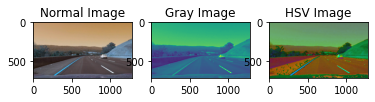

In [6]:
fig, axis = plt.subplots(1,3)
axis[0].imshow(img)
axis[0].set_title('Normal Image')
axis[1].imshow(gray)
axis[1].set_title('Gray Image')
axis[2].imshow(hsv)
axis[2].set_title('HSV Image')

In [7]:
img_copy = cv.GaussianBlur(img_copy, (5,5), 0)
hsv = cv.GaussianBlur(hsv, (5,5), 0)
gray = cv.GaussianBlur(gray, (5,5), 0)

Text(0.5, 1.0, 'HSV blur')

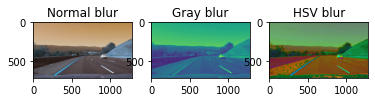

In [8]:
fig, axis = plt.subplots(1,3)
axis[0].imshow(img_copy)
axis[0].set_title('Normal blur')
axis[1].imshow(gray)
axis[1].set_title('Gray blur')
axis[2].imshow(hsv)
axis[2].set_title('HSV blur')

In [9]:
img_copy = cv.Canny(img_copy, 50, 150)
hsv = cv.Canny(hsv, 50, 150)
gray = cv.Canny(gray, 50, 150)

Text(0.5, 1.0, 'HSV Canny')

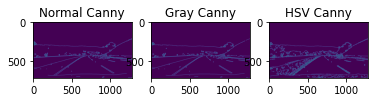

In [10]:
fig, axis = plt.subplots(1,3)
axis[0].imshow(img_copy)
axis[0].set_title('Normal Canny')
axis[1].imshow(gray)
axis[1].set_title('Gray Canny')
axis[2].imshow(hsv)
axis[2].set_title('HSV Canny')

In [11]:
def region_of_interest(image):
    try:
        ht = image.shape[0]
        wt = image.shape[1]
        polygon = np.array([
            [(293, ht-54),(1058, ht-54), (740, 440), (580, 440)]
        ])
        mask_black = np.zeros_like(image)
        cv.fillPoly(mask_black, polygon, 255)
        combine_image = cv.bitwise_and(image, mask_black)
        return combine_image
    except cv.error as e:
        print(e)

In [12]:
img_aoi = region_of_interest(img)
img_copy = region_of_interest(img_copy)
hsv = region_of_interest(hsv)
gray = region_of_interest(gray)

Text(0.5, 1.0, 'HSV Crop')

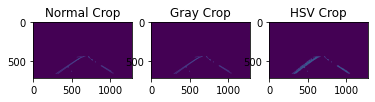

In [13]:
fig, axis = plt.subplots(1,3)
axis[0].imshow(img_copy)
axis[0].set_title('Normal Crop')
axis[1].imshow(gray)
axis[1].set_title('Gray Crop')
axis[2].imshow(hsv)
axis[2].set_title('HSV Crop')

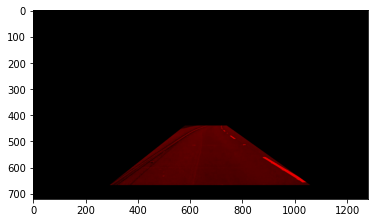

In [14]:
plt.imshow(img_aoi)

In [15]:
lines = cv.HoughLinesP(img_copy, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5)

In [21]:
def display_line(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            # print(x1, y1, x2, y2)
            cv.line(line_image, (x1,y1), (x2,y2), (0, 255, 0), 10)
    return line_image

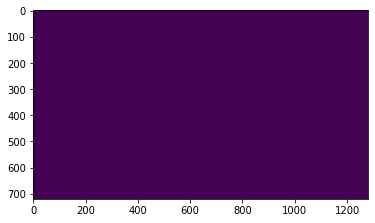

In [22]:
img_line = display_line(img_copy, lines)
plt.imshow(img_line)

In [18]:
# line_image = display_line(img, lines)
# img_aoi = display_line(img, lines)
lines = cv.HoughLinesP(img_copy, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5)
img_copy = display_line(img_copy, lines)
lines = cv.HoughLinesP(hsv, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5)
hsv = display_line(hsv, lines)
lines = cv.HoughLinesP(gray, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5)
gray = display_line(hsv, lines)

382 619 572 486
557 492 604 462
294 666 519 515
891 561 1016 636
878 561 957 612
317 666 419 594
960 612 1028 656
345 631 399 595
357 636 564 491
415 584 600 464
319 651 417 583
505 540 585 484
316 666 359 636
390 622 452 577
879 562 1030 656
344 651 471 559
892 562 1022 640
364 642 408 611
514 530 554 501
498 523 576 472
960 616 1007 646
521 507 577 470
416 604 459 572
905 570 969 609
382 622 444 578
359 639 400 610
913 580 970 614
336 637 412 587
382 619 573 485
891 561 1019 638
471 546 612 458
878 562 922 590
294 666 370 615
317 666 385 618
435 570 501 528
960 612 1028 656
878 561 957 612
395 597 437 570


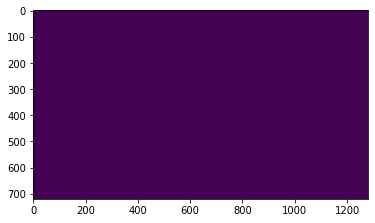

In [19]:
plt.imshow(img_copy)

Text(0.5, 1.0, 'HSV Crop')

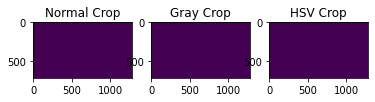

In [20]:
fig, axis = plt.subplots(1,3)
axis[0].imshow(img_copy)
axis[0].set_title('Normal Crop')
axis[1].imshow(gray)
axis[1].set_title('Gray Crop')
axis[2].imshow(hsv)
axis[2].set_title('HSV Crop')